## Question 4: How efficient/productive are AI tools used as part of developers' workflow?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('./Data/survey_results_public.csv')

In [3]:
# Look closely at the column: 'AIBen' (AI Benefits)
ai_vals = df["AIBen"].value_counts()
ai_vals

AIBen
Increase productivity;Greater efficiency;Speed up learning                                                               4391
Increase productivity;Greater efficiency                                                                                 3901
Increase productivity;Speed up learning                                                                                  3731
Increase productivity                                                                                                    3002
Increase productivity;Greater efficiency;Speed up learning;Improve accuracy in coding                                    2466
                                                                                                                         ... 
Greater efficiency;Speed up learning;Improve accuracy in coding;Make workload more manageable;Other (please specify):       1
Greater efficiency;Improve collaboration;Speed up learning;Make workload more manageable;Other (please specify):

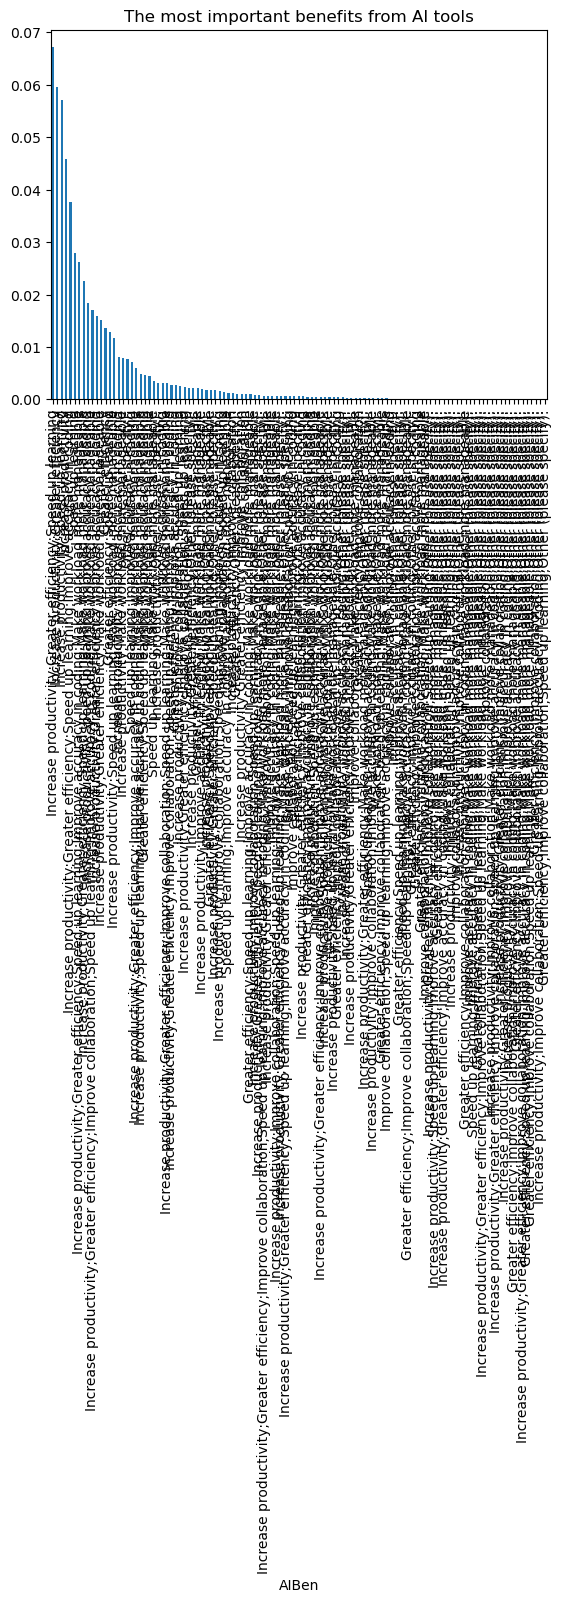

In [4]:
# Create bar chart of the proportion of individuals in each AIBen category
(ai_vals/df.shape[0]).plot(kind="bar");
plt.title("The most important benefits from AI tools");

In [6]:
ai_benefits = df['AIBen'].value_counts().reset_index()
ai_benefits

,AIBen,count
0,Increase productivity;Greater efficiency;Speed...,4391
1,Increase productivity;Greater efficiency,3901
2,Increase productivity;Speed up learning,3731
3,Increase productivity,3002
4,Increase productivity;Greater efficiency;Speed...,2466
...,...,...
108,Greater efficiency;Speed up learning;Improve a...,1
109,Greater efficiency;Improve collaboration;Speed...,1
110,Greater efficiency;Improve collaboration;Other...,1
111,Increase productivity;Improve collaboration;Sp...,1


In [7]:
ai_benefits.rename(columns={'AIBen': 'AI Benefits'}, inplace = True)
ai_benefits

,AI Benefits,count
0,Increase productivity;Greater efficiency;Speed...,4391
1,Increase productivity;Greater efficiency,3901
2,Increase productivity;Speed up learning,3731
3,Increase productivity,3002
4,Increase productivity;Greater efficiency;Speed...,2466
...,...,...
108,Greater efficiency;Speed up learning;Improve a...,1
109,Greater efficiency;Improve collaboration;Speed...,1
110,Greater efficiency;Improve collaboration;Other...,1
111,Increase productivity;Improve collaboration;Sp...,1


In [5]:
# Since the question about AI benefits contains mutiple answers, each participant may choose multiple answers
# with semi-colons for separation. So we need the following function to count how many participants have chosen
# for each answer

def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col1]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    counts = {key: 0 for key in look_for}
    
    for key in look_for:
        # Filter rows where col1 contains the key
        mask = df[col1].str.contains(key, case=False, na=False, regex=False)
        
        # Sum the values in col2 for the filtered rows
        counts[key] = df[mask][col2].sum()
    
    result_df = pd.DataFrame(list(counts.items()), columns=[col1, 'Total Count'])
    result_df.sort_values('Total Count', ascending = False, inplace = True)
    return result_df

In [8]:
possible_ai_vals = ['Increase productivity',
                    'Greater efficiency',
                    'Make workload more manageable',
                    'Improve collaboration',
                    'Speed up learning',
                    'Improve accuracy in coding',
                    'None of the above',
                    'Other (please specify):']

ai_benefits_df = total_count(ai_benefits, 'AI Benefits', 'count', possible_ai_vals)
ai_benefits_df.set_index('AI Benefits', inplace = True)
ai_benefits_df['Percentage'] = ai_benefits_df / ai_benefits_df.sum()
ai_benefits_df


,Total Count,Percentage
AI Benefits,,
Increase productivity,29892,0.300105
Speed up learning,23022,0.231133
Greater efficiency,21586,0.216716
Improve accuracy in coding,11165,0.112093
Make workload more manageable,9234,0.092706
Improve collaboration,2867,0.028784
Other (please specify):,1839,0.018463
None of the above,0,0.000000


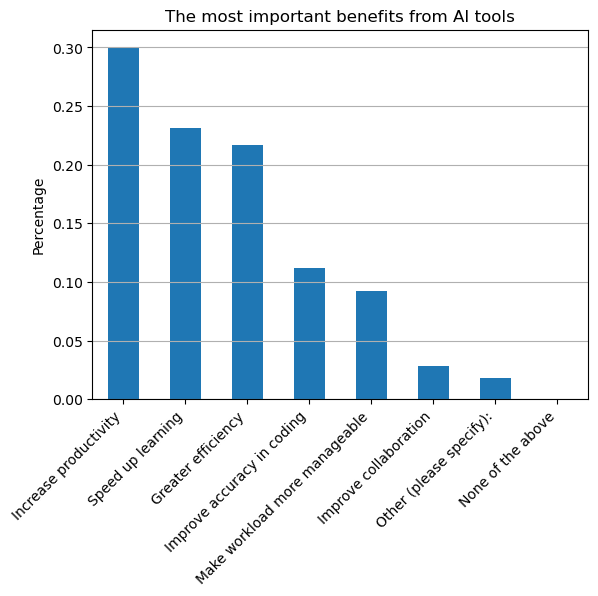

In [10]:
# Plot the cleaned data of AIBen
ai_benefits_df['Percentage'].plot(kind='bar', legend=None);
plt.title('The most important benefits from AI tools');
plt.xlabel('')
plt.ylabel("Percentage")
plt.grid(axis = 'y')
plt.xticks(rotation=45, ha='right')
plt.show()

## Question 5: Do benefits from using AI tools relate to job satisfaction and yearly compensation?

In [11]:
import pandas as pd
import numpy as np
from scipy import stats

def mean_amt(df, col1, col2, look_for):
    result_data = []

    for key in look_for:
        # Filter rows where col1 contains the key
        mask = df[col1].str.contains(key, case=False, na=False, regex=False)
        
        # Extract relevant data
        filtered_data = df[mask][col2]
        
        # Calculate statistics
        sum_values = filtered_data.sum()
        count_values = filtered_data.count()
        sum_squares = (filtered_data**2).sum()
        mean_value = filtered_data.mean()
        variance_value = filtered_data.var(ddof=1)  # Sample variance
        std_dev_value = filtered_data.std(ddof=1)   # Sample standard deviation
        
        # Calculate 95% confidence intervals
        conf_int = stats.t.interval(0.95, count_values - 1, loc=mean_value, 
                                    scale=std_dev_value/np.sqrt(count_values))
        lower_bound, upper_bound = conf_int
        
        # Append results
        result_data.append([key, sum_values, count_values, sum_squares, mean_value, 
                            variance_value, std_dev_value, lower_bound, upper_bound])
    
    # Create the final DataFrame
    result_df = pd.DataFrame(result_data, columns=[col1, 'Sum', 'Count', 'Sum of Squares', 'Mean', 
                                                   'Variance', 'Standard Deviation', '95% Lower Bound', '95% Upper Bound'])
    
    return result_df

In [22]:
# We compute the mean job satisfaction for each element in possible_ai_vals
df_jobsat = mean_amt(df, 'AIBen', 'JobSat', possible_ai_vals)
df_jobsat.dropna(how = 'any', inplace = True)
df_jobsat.sort_values('Mean', ascending = False)

,AIBen,Sum,Count,Sum of Squares,Mean,Variance,Standard Deviation,95% Lower Bound,95% Upper Bound
1,Greater efficiency,75335.0,10735,574681.0,7.017699,4.285694,2.070192,6.978533,7.056865
0,Increase productivity,104720.0,14923,798122.0,7.017356,4.239680,2.059048,6.984317,7.050394
3,Improve collaboration,9863.0,1407,76181.0,7.009950,5.008436,2.237953,6.892912,7.126988
5,Improve accuracy in coding,36130.0,5163,275636.0,6.997869,4.417469,2.101778,6.940526,7.055213
4,Speed up learning,76400.0,11035,578738.0,6.923425,4.512262,2.124208,6.883788,6.963063
7,Other (please specify):,6572.0,953,49844.0,6.896118,4.750752,2.179622,6.757558,7.034677
2,Make workload more manageable,30255.0,4440,227591.0,6.814189,4.827147,2.197077,6.749546,6.878832


In [24]:
# We compute the mean yearly compensation for each element in possible_ai_vals
df_yearly_comp = mean_amt(df, 'AIBen', 'ConvertedCompYearly', possible_ai_vals)
df_yearly_comp.dropna(how = 'any', inplace = True)
df_yearly_comp.sort_values('Mean', ascending = False)

,AIBen,Sum,Count,Sum of Squares,Mean,Variance,Standard Deviation,95% Lower Bound,95% Upper Bound
7,Other (please specify):,8.895195e+07,775,2.769594e+14,114776.708387,3.446380e+11,587058.765636,73380.699606,156172.717169
3,Improve collaboration,9.064318e+07,1002,4.685323e+14,90462.254491,4.598726e+11,678139.089696,48422.667035,132501.841947
1,Greater efficiency,7.312223e+08,8573,5.967526e+14,85293.630001,6.234065e+10,249681.086862,80007.611829,90579.648173
0,Increase productivity,1.013221e+09,12131,6.557961e+14,83523.327673,4.708726e+10,216995.993709,79661.482639,87385.172706
4,Speed up learning,7.192500e+08,8889,5.845357e+14,80914.608842,5.921894e+10,243349.412708,75855.068229,85974.149455
2,Make workload more manageable,2.754102e+08,3417,5.147128e+14,80599.992684,1.441788e+11,379708.817027,67864.076568,93335.908799
5,Improve accuracy in coding,3.192767e+08,3995,5.237900e+14,79919.070839,1.247556e+11,353207.547127,68963.088984,90875.052693


In [25]:
# Function to normalize between -1 and 1
def normalize_minus1_to_1(x):
    return 2 * (x - x.min()) / (x.max() - x.min()) - 1

In [26]:
df_jobsat.rename(columns = {'Mean': 'JobSat_Mean'}, inplace = True)
df_yearly_comp.rename(columns = {'Mean': 'YearlyComp_Mean'}, inplace = True)
df_all = pd.merge(df_jobsat[['AIBen','JobSat_Mean']],
                  df_yearly_comp[['AIBen','YearlyComp_Mean']], how='inner', on='AIBen')

In [27]:
df_all

,AIBen,JobSat_Mean,YearlyComp_Mean
0,Increase productivity,7.017356,83523.327673
1,Greater efficiency,7.017699,85293.630001
2,Make workload more manageable,6.814189,80599.992684
3,Improve collaboration,7.009950,90462.254491
4,Speed up learning,6.923425,80914.608842
5,Improve accuracy in coding,6.997869,79919.070839
6,Other (please specify):,6.896118,114776.708387


In [28]:
df_all['JobSat_Mean'] = normalize_minus1_to_1(df_all['JobSat_Mean'])
df_all['YearlyComp_Mean'] = normalize_minus1_to_1(df_all['YearlyComp_Mean'])
df_all.set_index('AIBen', inplace = True)

In [29]:
df_all.rename(columns = {'JobSat_Mean': 'Job Satisfaction', 
                         'CompYearly_Mean': 'Yearly Compensation'}, inplace=True)

In [30]:
df_all.sort_values('Job Satisfaction', ascending = False, inplace=True)
df_all

,Job Satisfaction,YearlyComp_Mean
AIBen,,
Greater efficiency,1.000000,-0.691628
Increase productivity,0.996626,-0.793201
Improve collaboration,0.923848,-0.395072
Improve accuracy in coding,0.805123,-1.000000
Speed up learning,0.073523,-0.942880
Other (please specify):,-0.194847,1.000000
Make workload more manageable,-1.000000,-0.960931


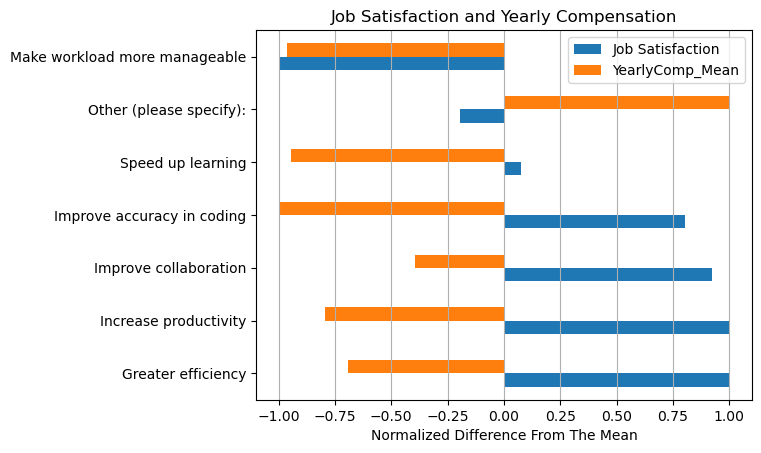

In [31]:
df_all.plot(kind='barh')
plt.title('Job Satisfaction and Yearly Compensation')
plt.xlabel('Normalized Difference From The Mean')
plt.ylabel('')
plt.grid(axis = 'x')
# plt.yticks(rotation=45, ha='right')
plt.show()